# LIBRERIAS


Se cargan todas las librerias usadas durante el proyecto

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras import models
from keras import layers

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
%matplotlib inline

# PREPROCESAMIENTO

Se carga la base de datos de accidentes de tráfico de California

In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('tablafinal.csv', sep=';',encoding='latin-1')
data.head()

,ID,zona,county_road_area,interstate,stateroute,autopista,notchp,num,calle,mal_tiempo,...,insurance,cellphone,marca,piel_clara,asiatico,hispano,conductor_victima,pasajero_victima,victimas_heridas,muertos
0,3858022,fresno,0,0,0,0,1,1STST,EASTCLINTON,0.0,...,1.0,NaN,dodge,0.0,0.0,0.0,1.0,0.0,0,0
1,3858022,fresno,0,0,0,0,1,1STST,EASTCLINTON,0.0,...,1.0,NaN,dodge,0.0,0.0,0.0,1.0,0.0,0,0
2,3858022,fresno,0,0,0,0,1,1STST,EASTCLINTON,0.0,...,1.0,NaN,nissan,0.0,0.0,1.0,1.0,0.0,0,0
3,3858022,fresno,0,0,0,0,1,1STST,EASTCLINTON,0.0,...,1.0,NaN,nissan,0.0,0.0,1.0,1.0,0.0,0,0
4,3899450,losangeles,0,1,0,0,0,RT710,CARSONST,0.0,...,1.0,0.0,toyota,0.0,0.0,0.0,1.0,0.0,1,0


Consta de un conjunto de datos de 10k datos

Training -> accidentes: con diversa información sobre los accidentes y su ocurrencia

Output -> muertos: Muestra los pasajeros que no han sobrevivido al accidente.

In [4]:
data.columns

Index(['ID', 'zona', 'county_road_area', 'interstate', 'stateroute',
       'autopista', 'notchp', 'num', 'calle', 'mal_tiempo', 'buen_tiempo',
       'alta_vel', 'mal_giro/dir', 'alcohol', 'mal_cmbio_linea',
       'peaton_incumplimiento', 'por_señales', 'otra_causa', 'floor_dry',
       'floor_wet', 'tow_away', 'pedestrian_collision', 'bicycle_collision',
       'truck_collision', 'motorcycle_collision',
       'complaint_of_pain_injury_count', 'collision_time', 'collision_date',
       'party_count', 'male', 'victim_age', 'air_bag', 'car_belt', 'insurance',
       'cellphone', 'marca', 'piel_clara', 'asiatico', 'hispano',
       'conductor_victima', 'pasajero_victima', 'victimas_heridas', 'muertos'],
      dtype='object')

Para reducir el número de columnas se han decidido quitar variables que no nos aportaban un valor real como la étnia o variables categóricas como la calle en la que ocurrio el , (floor_dry se quita porque hay otra variable que indica lo mismo que es floor_wet)

In [5]:
data = data.drop(['collision_time','zona','num','calle','marca','collision_date','ID',
                  'floor_dry', 'male', 'piel_clara', 'asiatico', 'hispano'], axis=1)

Ver como está distribuida la variable objetivo (muertos)

In [6]:
valores_muertos = data['muertos'].value_counts()
print(valores_muertos)

muertos
0    9575
1     425
Name: count, dtype: int64


In [7]:
data.shape

(10000, 31)

In [8]:
data.isnull().sum()

county_road_area                     0
interstate                           0
stateroute                           0
autopista                            0
notchp                               0
mal_tiempo                          37
buen_tiempo                         37
alta_vel                           399
mal_giro/dir                       399
alcohol                            399
mal_cmbio_linea                    399
peaton_incumplimiento              399
por_señales                        399
otra_causa                         399
floor_wet                           49
tow_away                             0
pedestrian_collision                 1
bicycle_collision                    1
truck_collision                      1
motorcycle_collision                 1
complaint_of_pain_injury_count       0
party_count                          0
victim_age                         692
air_bag                           1426
car_belt                          1755
insurance                

Al tener un número bajo de datos nulos se decide no elimar estas columnas

In [9]:
data=data.dropna()

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(4676, 31)

Verificar si hay valores menores de 0

In [12]:
valores_menores_cero = (data < 0).any().any()
valores_menores_cero

False

Se muestrean los formatos de las columnas

In [13]:
data.dtypes

county_road_area                    int64
interstate                          int64
stateroute                          int64
autopista                           int64
notchp                              int64
mal_tiempo                        float64
buen_tiempo                       float64
alta_vel                          float64
mal_giro/dir                      float64
alcohol                           float64
mal_cmbio_linea                   float64
peaton_incumplimiento             float64
por_señales                       float64
otra_causa                        float64
floor_wet                         float64
tow_away                            int64
pedestrian_collision              float64
bicycle_collision                 float64
truck_collision                   float64
motorcycle_collision              float64
complaint_of_pain_injury_count      int64
party_count                         int64
victim_age                        float64
air_bag                           

In [14]:
data.describe()

,county_road_area,interstate,stateroute,autopista,notchp,mal_tiempo,buen_tiempo,alta_vel,mal_giro/dir,alcohol,...,party_count,victim_age,air_bag,car_belt,insurance,cellphone,conductor_victima,pasajero_victima,victimas_heridas,muertos
count,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,...,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.0,4676.0,4676.000000,4676.000000
mean,0.154192,0.216210,0.170231,0.057528,0.387511,0.093884,0.906116,0.379812,0.318648,0.109495,...,1.708084,39.788281,0.202737,0.971985,0.924722,0.016681,1.0,0.0,1.229042,0.050470
std,0.361171,0.411703,0.375876,0.232873,0.487234,0.291698,0.291698,0.485392,0.466002,0.312293,...,0.825857,15.735341,0.402081,0.165034,0.263868,0.128087,0.0,0.0,1.741331,0.218937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,27.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,38.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.0,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,2.000000,50.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.0,2.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,103.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,25.000000,1.000000


In [15]:
Muertosno=data[data['muertos']==0].sample(n=150, random_state=1)
Muertossi=data[data['muertos']==1].sample(n=150, random_state=1)

data = pd.concat([Muertosno, Muertossi],axis=0)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_q1 = data.drop('muertos', axis=1).values
Y_q1 = data['muertos'].values

scaler = MinMaxScaler()

X_train_q1, X_test_q1, Y_train_q1, Y_test_q1 = train_test_split(X_q1, Y_q1, test_size=0.2, random_state=42)

# Normalizar los datos de entrenamiento
X_train_q1 = scaler.fit_transform(X_train_q1)

# Transformar los datos de prueba usando el mismo escalador
X_test_q1 = scaler.transform(X_test_q1)

X_train_q1.shape, Y_train_q1.shape

((240, 30), (240,))

In [17]:
X_test_q1.shape, Y_test_q1.shape

((60, 30), (60,))

Se calcula la covarianza de las 15 columnas más influyentes para ver el peso que tienen estas frente a la variable objetivo

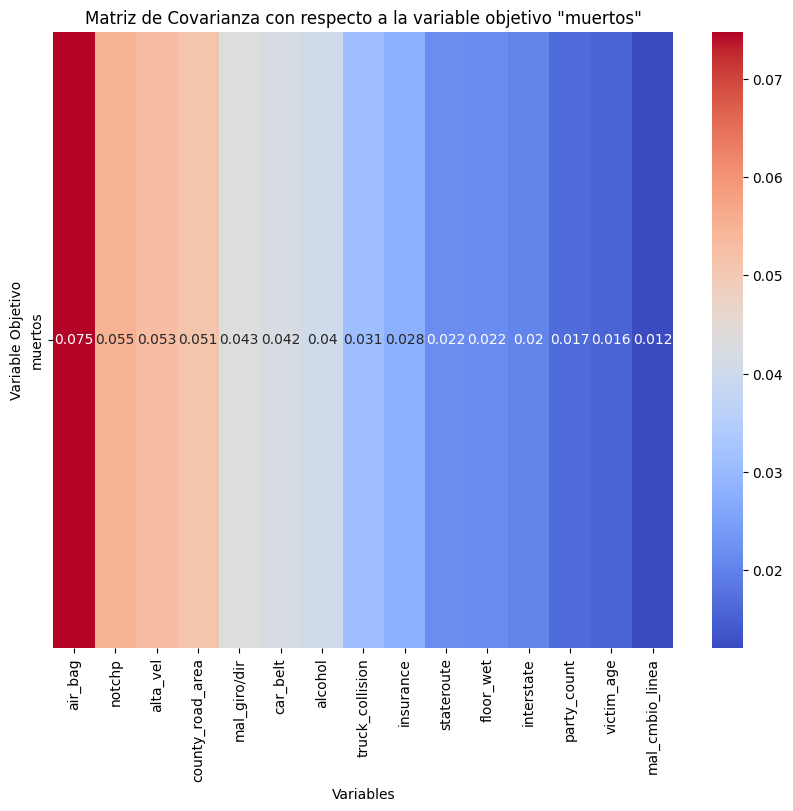

In [18]:
import seaborn as sns

# Create DataFrame for the training data
X_train_df = pd.DataFrame(X_train_q1, columns=data.drop('muertos', axis=1).columns)
Y_train_df = pd.DataFrame(Y_train_q1, columns=['muertos'])

# Concatenate the DataFrames of the features and the target variable
train_df = pd.concat([X_train_df, Y_train_df.reset_index(drop=True)], axis=1)

# Calculate the covariance matrix between all columns
covarianza_total = train_df.cov()

# Filter the covariance only for the target variable 'muertos'
covarianza_con_muertos = covarianza_total[['muertos']].drop('muertos')

# Select the top 15 columns based on absolute covariance values
top_n = 15
covarianza_con_muertos_abs = covarianza_con_muertos.abs()
top_features = covarianza_con_muertos_abs.nlargest(top_n, 'muertos')

# Create a heatmap of the selected covariances
plt.figure(figsize=(10, 8))
sns.heatmap(top_features.T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Matriz de Covarianza con respecto a la variable objetivo "muertos"')
plt.xlabel('Variables')
plt.ylabel('Variable Objetivo')
plt.show()

la covarianza no nos acaba de aportar una gran información por lo que se procede a calcular la correlación

<ipython-input-19-d10fb1f632b1>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacion_con_muertos['muertos'].values, y=correlacion_con_muertos.index, orient='h', palette='viridis')


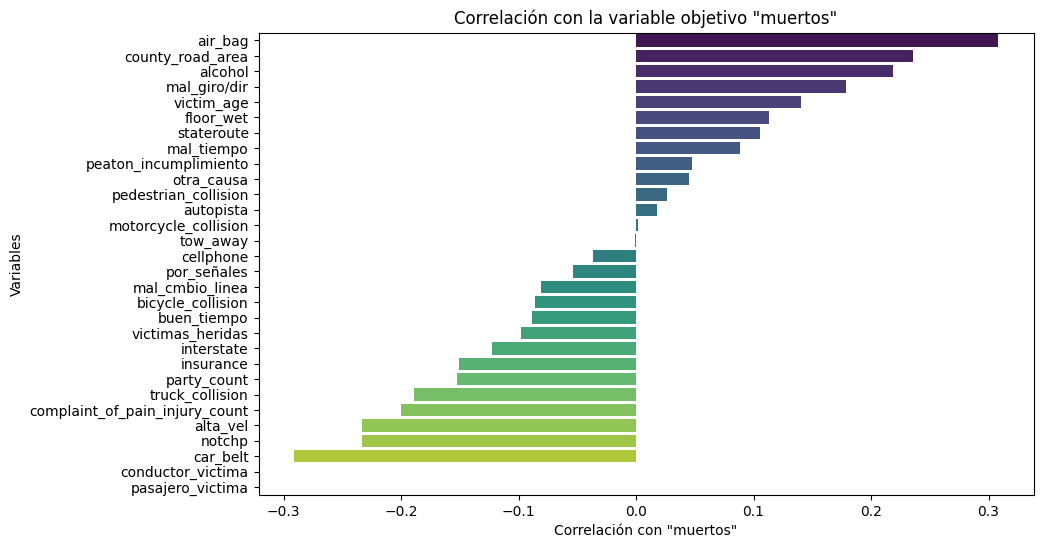

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear DataFrames para los datos de entrenamiento
X_train_df = pd.DataFrame(X_train_q1, columns=data.drop('muertos', axis=1).columns)
Y_train_df = pd.DataFrame(Y_train_q1, columns=['muertos'])

# Concatenar los DataFrames de las características y la variable objetivo
train_df = pd.concat([X_train_df, Y_train_df.reset_index(drop=True)], axis=1)

# Calcular la matriz de correlación
correlation_matrix = train_df.corr()

# Extraer la correlación con la variable objetivo 'muertos'
correlation_con_muertos = correlation_matrix[['muertos']].drop('muertos')

# Ordena los valores de correlación de mayor a menor
correlacion_con_muertos = correlation_con_muertos.sort_values(by='muertos', ascending=False)

# Graficar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacion_con_muertos['muertos'].values, y=correlacion_con_muertos.index, orient='h', palette='viridis')
plt.xlabel('Correlación con "muertos"')
plt.ylabel('Variables')
plt.title('Correlación con la variable objetivo "muertos"')
plt.show()


Se pasa a calcular la correlación de nuestras variables con respecto a muertos para quedarnos con aquellas que más peso tienen en esta, ya que son las que más a influir en nuestro problema y así se mejora la velocidad de calculo tanto en la parte clásica como cuántica

In [20]:
# Seleccionar las 15 características con mayor correlación
caracteristicas_seleccionadas = correlacion_con_muertos.index[:15]

# Filtrar el DataFrame de correlaciones con las características seleccionadas
correlacion_seleccionadas = correlation_con_muertos.loc[caracteristicas_seleccionadas]
correlacion_seleccionadas

,muertos
air_bag,0.308323
county_road_area,0.235760
alcohol,0.218275
mal_giro/dir,0.178594
victim_age,0.140364
floor_wet,0.113501
stateroute,0.105526
mal_tiempo,0.088221
peaton_incumplimiento,0.047973
otra_causa,0.045179


In [21]:
caracteristicas_seleccionadas

Index(['air_bag', 'county_road_area', 'alcohol', 'mal_giro/dir', 'victim_age',
       'floor_wet', 'stateroute', 'mal_tiempo', 'peaton_incumplimiento',
       'otra_causa', 'pedestrian_collision', 'autopista',
       'motorcycle_collision', 'tow_away', 'cellphone'],
      dtype='object')

Se muestra un gráfico que muestra como están distribuidos nuestros datos

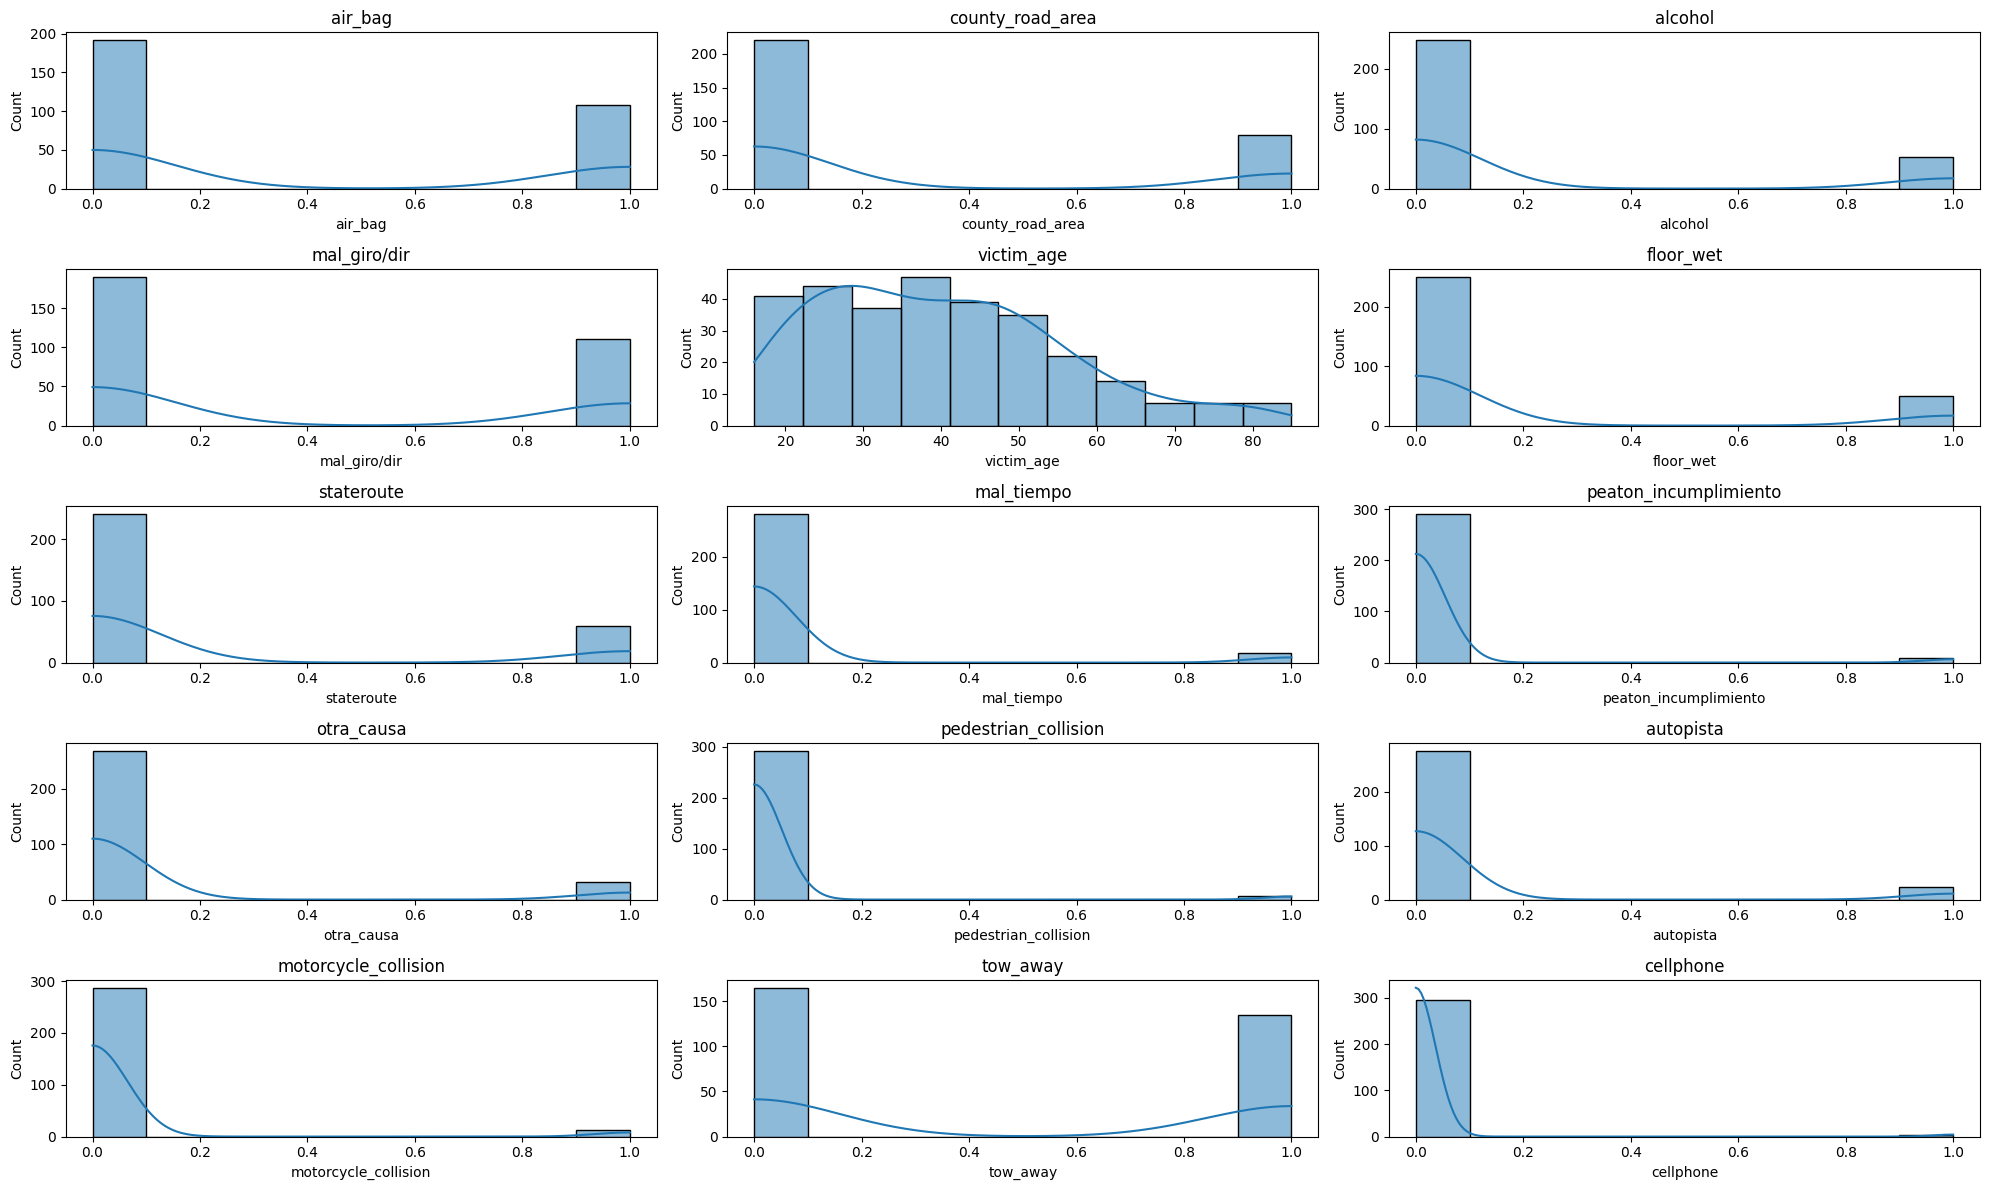

In [22]:
# Crear un DataFrame solo con las características seleccionadas
data_selected = data[caracteristicas_seleccionadas]

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 12))

# Generar subgráficos para cada característica seleccionada
for i, feature in enumerate(caracteristicas_seleccionadas, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data_selected[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()


Una vez se tienen las variables seleccionadas se vuelven a separar los datos quedándonos solos con estas columnas

In [23]:
X_q1 = data[caracteristicas_seleccionadas].values
Y_q1 = data['muertos'].values

scaler = MinMaxScaler()

X_train_q1, X_test_q1, Y_train_q1, Y_test_q1 = train_test_split(X_q1, Y_q1, test_size=0.2, random_state=42)

# Normalizar los datos de entrenamiento
X_train_q1 = scaler.fit_transform(X_train_q1)

# Transformar los datos de prueba usando el mismo escalador
X_test_q1 = scaler.transform(X_test_q1)

print(X_train_q1.shape, Y_train_q1.shape)
print(X_test_q1.shape, Y_test_q1.shape)

(240, 15) (240,)
(60, 15) (60,)


# MODELOS CLÁSICOS

### CLASIFICADOR CLÁSICO

SE PRUEBAN DISTINTOS MODELOS CON DISTINTAS CONFIGURACIONES

Además se muestra la precisión de nuestros clasificadores clásicos con los datos de train

In [24]:
clf = LogisticRegression(C=1.0, penalty='l1', solver='liblinear', multi_class='auto')

clf2 = SVC(kernel='rbf', random_state=1, C=1, probability=True)

clf3 = SGDClassifier(loss='modified_huber')

clf4 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)

# Random Forest Classifier
clf5 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Gradient Boosting Classifier
clf6 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Ada Boost Classifier
clf7 = AdaBoostClassifier(n_estimators=100, random_state=42)

clf.fit(X_train_q1, Y_train_q1)
clf2.fit(X_train_q1, Y_train_q1)
clf3.fit(X_train_q1, Y_train_q1)
clf4.fit(X_train_q1, Y_train_q1)
clf5.fit(X_train_q1, Y_train_q1)
clf6.fit(X_train_q1, Y_train_q1)
clf7.fit(X_train_q1, Y_train_q1)

# Predecir etiquetas usando los modelos entrenados en los datos de entrenamiento
predict_clf_clasico_train = clf.predict(X_train_q1)
predict_clf_clasico2_train = clf2.predict(X_train_q1)
predict_clf_clasico3_train = clf3.predict(X_train_q1)
predict_clf_clasico4_train = clf4.predict(X_train_q1)
predict_clf_clasico5_train = clf5.predict(X_train_q1)
predict_clf_clasico6_train = clf6.predict(X_train_q1)
predict_clf_clasico7_train = clf7.predict(X_train_q1)

# Calcular la precisión en los datos de entrenamiento
accuracy_clc_clasico_train = accuracy_score(Y_train_q1, predict_clf_clasico_train)
accuracy_clc_clasico2_train = accuracy_score(Y_train_q1, predict_clf_clasico2_train)
accuracy_clc_clasico3_train = accuracy_score(Y_train_q1, predict_clf_clasico3_train)
accuracy_clc_clasico4_train = accuracy_score(Y_train_q1, predict_clf_clasico4_train)
accuracy_clc_clasico5_train = accuracy_score(Y_train_q1, predict_clf_clasico5_train)
accuracy_clc_clasico6_train = accuracy_score(Y_train_q1, predict_clf_clasico6_train)
accuracy_clc_clasico7_train = accuracy_score(Y_train_q1, predict_clf_clasico6_train)

# Imprimir la precisión en los datos de entrenamiento
print("LogisticRegression - Precisión:", accuracy_clc_clasico_train)
print("SVM - Precisión:", accuracy_clc_clasico2_train)
print("SGDClassifier - Precisión:", accuracy_clc_clasico3_train)
print("DecisionTreeClassifier - Precisión:", accuracy_clc_clasico4_train)
print("Random Forest Classifier - Precisión:", accuracy_clc_clasico5_train)
print("Gradient Boosting Classifier - Precisión:", accuracy_clc_clasico6_train)
print("Ada Boost Classifier - Precisión:", accuracy_clc_clasico7_train)

LogisticRegression - Precisión: 0.7375
SVM - Precisión: 0.8166666666666667
SGDClassifier - Precisión: 0.5916666666666667
DecisionTreeClassifier - Precisión: 0.7708333333333334
Random Forest Classifier - Precisión: 0.825
Gradient Boosting Classifier - Precisión: 0.8958333333333334
Ada Boost Classifier - Precisión: 0.8958333333333334


Se muestra la precisión de nuestros clasificadores clásicos con los datos de test

In [25]:
predict_clf_clasico=clf.predict(X_test_q1)
predict_clf_clasico2=clf2.predict(X_test_q1)
predict_clf_clasico3=clf3.predict(X_test_q1)
predict_clf_clasico4 = clf4.predict(X_test_q1)
predict_clf_clasico5 = clf5.predict(X_test_q1)
predict_clf_clasico6 = clf6.predict(X_test_q1)
predict_clf_clasico7 = clf7.predict(X_test_q1)

accuracy_clc_clasico = accuracy_score(Y_test_q1, predict_clf_clasico)
accuracy_clc_clasico2 = accuracy_score(Y_test_q1, predict_clf_clasico2)
accuracy_clc_clasico3 = accuracy_score(Y_test_q1, predict_clf_clasico3)
accuracy_clc_clasico4 = accuracy_score(Y_test_q1, predict_clf_clasico4)
accuracy_clc_clasico5 = accuracy_score(Y_test_q1, predict_clf_clasico5)
accuracy_clc_clasico6 = accuracy_score(Y_test_q1, predict_clf_clasico6)
accuracy_clc_clasico7 = accuracy_score(Y_test_q1, predict_clf_clasico7)

print("LogisticRegression - Precisión", accuracy_clc_clasico)
print("SVM - Precisión", accuracy_clc_clasico2)
print("SGDClassifier - Precisión:", accuracy_clc_clasico3)
print("DecisionTreeClassifier - Precisión:", accuracy_clc_clasico4)
print("Random Forest Classifier - Precisión:", accuracy_clc_clasico5)
print("Gradient Boosting Classifier - Precisión:", accuracy_clc_clasico6)
print("Ada Boost Classifier - Precisión:", accuracy_clc_clasico7)

LogisticRegression - Precisión 0.5833333333333334
SVM - Precisión 0.5833333333333334
SGDClassifier - Precisión: 0.65
DecisionTreeClassifier - Precisión: 0.6833333333333333
Random Forest Classifier - Precisión: 0.5833333333333334
Gradient Boosting Classifier - Precisión: 0.5833333333333334
Ada Boost Classifier - Precisión: 0.6833333333333333


Nos han salido resultados algo bajos, pero vamos a ver como mejorar estos resultados mediante distintos métidos (RandomizedSearchCV y GridSearchCV).

### CC LogisticRegression MEJORADO


El modelo clásico que peor ha funcionado ha sido LogisticRegression, ver si se puede mejorar la precisión de esta cogiendo 'los mejores' parámetros

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np

# Definir el modelo base
model_lr = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

# Definir el grid de hiperparámetros a probar
param_dist_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'penalty': ['l2'],  # Tipo de penalización (l1 va bastante peor por eso se deja l2)
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],  # Solvers posibles
    'multi_class': ['auto', 'ovr']  # Estrategias para la clasificación multiclase
}

# Configurar RandomizedSearchCV
random_search_lr = RandomizedSearchCV(estimator=model_lr, param_distributions=param_dist_lr, n_iter=10, cv=10, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Ejecutar random search
random_search_lr.fit(X_train_q1, Y_train_q1)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search_lr.best_params_)

# Mejor score encontrado
print("Mejor score de precisión:", random_search_lr.best_score_)

# Configurar el modelo con los mejores hiperparámetros
best_model_lr = random_search_lr.best_estimator_

# Realizar validación cruzada con el modelo final para confirmar los resultados
scores_lr = cross_val_score(best_model_lr, X_train_q1, Y_train_q1, cv=10, scoring='accuracy')
print(f'Precisión promedio con el mejor modelo: {np.mean(scores_lr)}')


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores hiperparámetros: {'solver': 'sag', 'penalty': 'l2', 'multi_class': 'auto', 'C': 0.1}
Mejor score de precisión: 0.7000000000000001
Precisión promedio con el mejor modelo: 0.7000000000000001


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

# Definir el modelo base
model_lr = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

# Definir el grid de hiperparámetros a probar
param_dist_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'penalty': ['l2'],  # Tipo de penalización (l1 va bastante peor por eso se deja l2)
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],  # Solvers posibles
    'multi_class': ['auto', 'ovr']  # Estrategias para la clasificación multiclase
}

# Configurar GridSearchCV
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_dist_lr, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Ejecutar grid search
grid_search_lr.fit(X_train_q1, Y_train_q1)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search_lr.best_params_)

# Mejor score encontrado
print("Mejor score de precisión:", grid_search_lr.best_score_)

# Configurar el modelo con los mejores hiperparámetros
best_model_lr = grid_search_lr.best_estimator_

# Realizar validación cruzada con el modelo final para confirmar los resultados
scores_lr = cross_val_score(best_model_lr, X_train_q1, Y_train_q1, cv=10, scoring='accuracy')
print(f'Precisión promedio con el mejor modelo: {np.mean(scores_lr)}')


Fitting 10 folds for each of 72 candidates, totalling 720 fits
Mejores hiperparámetros: {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor score de precisión: 0.7000000000000001
Precisión promedio con el mejor modelo: 0.7000000000000001


Evalúa el modelo en el conjunto de prueba con los mejores hiperparámetros que se han calcualdo con los datos de entrenamiento

In [28]:
best_model_lr.fit(X_train_q1, Y_train_q1)

# Evalúa el modelo en el conjunto de prueba
precision = best_model_lr.score(X_test_q1, Y_test_q1)
print("Precisión del modelo LR optimizado:", precision)

y_pred_lr = best_model_lr.predict(X_test_q1)

Precisión del modelo LR optimizado: 0.5833333333333334


Se puede observar como escogiendo los mejores hiperparámetros el modelo aumenta un 2% (mejora notable), aunque sigue siendo baja respecta a otros modelos clásicos

### CC SVM MEJORADO

In [29]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Definir los parámetros que deseas optimizar
parametros = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'sigmoid', 'poly']}

# Inicializar el clasificador SVM con probability=True
svm = SVC(probability=True)

# Inicializar la búsqueda aleatoria con n_jobs=-1 para usar todos los núcleos disponibles
random_search = RandomizedSearchCV(svm, parametros, cv=5, n_iter=20, n_jobs=-1, random_state=42)

# Realizar la búsqueda aleatoria para encontrar los mejores parámetros
random_search.fit(X_train_q1, Y_train_q1)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", random_search.best_params_)

# Utilizar los mejores parámetros para el SVM
svm_optimo = SVC(**random_search.best_params_, probability=True)

# Entrenar el modelo SVM con los mejores parámetros encontrados
svm_optimo.fit(X_train_q1, Y_train_q1)

# Obtener las predicciones en el conjunto de prueba
predicciones = svm_optimo.predict(X_test_q1)

# Calcular y mostrar la precisión del modelo con los mejores parámetros
precision = accuracy_score(Y_test_q1, predicciones)
print("Precisión del mejor modelo SVM:", precision)

# Realizar validación cruzada con el modelo final para confirmar los resultados
scores_sv = cross_val_score(svm_optimo, X_train_q1, Y_train_q1, cv=10, scoring='accuracy', n_jobs=-1)
print(f'Precisión promedio con el mejor modelo SVM: {np.mean(scores_sv)}')

Mejores parámetros: {'kernel': 'linear', 'gamma': 0.1, 'C': 10}
Precisión del mejor modelo SVM: 0.65
Precisión promedio con el mejor modelo SVM: 0.6833333333333333


Se pasa a hacer el GRIDSEARCH

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definir el clasificador SVM
model_svm = SVC(random_state=42, probability=True)

# Definir el grid de hiperparámetros a probar
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Configurar GridSearchCV
grid_search_svm = GridSearchCV(estimator=model_svm, param_grid=param_grid_svm, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Ejecutar grid search
grid_search_svm.fit(X_train_q1, Y_train_q1)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros para SVM:", grid_search_svm.best_params_)

# Mejor score encontrado
print("Mejor score de precisión para SVM:", grid_search_svm.best_score_)

# Configurar el modelo con los mejores hiperparámetros
best_model_svm = grid_search_svm.best_estimator_

# Realizar validación cruzada con el modelo final para confirmar los resultados
scores_svm = cross_val_score(best_model_svm, X_train_q1, Y_train_q1, cv=10, scoring='accuracy')
print(f'Precisión promedio con el mejor modelo SVM: {np.mean(scores_svm)}')


Fitting 10 folds for each of 36 candidates, totalling 360 fits
Mejores hiperparámetros para SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}
Mejor score de precisión para SVM: 0.6916666666666667
Precisión promedio con el mejor modelo SVM: 0.6916666666666667


In [31]:
best_model_svm.fit(X_train_q1, Y_train_q1)

# Evalúa el modelo en el conjunto de prueba
precision = best_model_svm.score(X_test_q1, Y_test_q1)
print("Precisión del modelo SVM optimizado:", precision)

y_pred_svm = best_model_svm.predict(X_test_q1)

Precisión del modelo SVM optimizado: 0.65


### CC ADA BOOST MEJORADO

Se ha probado además de GridSearchCV, RandomizedSearchCV este lo que hace es seleccionar un número fijo de combinaciones aleatorias (n_iter=10). Esto hace que funcione más rapido pero no siempre nos sale el mismo resultado que GridSearchCV ya que este busca la mejor combinación de todas, en este caso si coincide

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np

# Definir el modelo base
model_ada = AdaBoostClassifier(random_state=42)

# Definir el grid de hiperparámetros a probar
param_dist_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']  #default=’SAMME.R’
}

# Configurar RandomizedSearchCV
random_search_ada = RandomizedSearchCV(estimator=model_ada, param_distributions=param_dist_ada, n_iter=10, cv=10, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Ejecutar random search
random_search_ada.fit(X_train_q1, Y_train_q1)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros para AdaBoost:", random_search_ada.best_params_)

# Mejor score encontrado
print("Mejor score de precisión para AdaBoost:", random_search_ada.best_score_)

# Configurar el modelo con los mejores hiperparámetros
best_model_ada = random_search_ada.best_estimator_

# Realizar validación cruzada con el modelo final para confirmar los resultados
scores_ada = cross_val_score(best_model_ada, X_train_q1, Y_train_q1, cv=10, scoring='accuracy')
print(f'Precisión promedio con el mejor modelo AdaBoost: {np.mean(scores_ada)}')


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Mejores hiperparámetros para AdaBoost: {'n_estimators': 200, 'learning_rate': 0.1, 'algorithm': 'SAMME'}
Mejor score de precisión para AdaBoost: 0.6666666666666667
Precisión promedio con el mejor modelo AdaBoost: 0.6666666666666667


In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

# Definir el modelo base
model_ada = AdaBoostClassifier(random_state=42)

# Definir el grid de hiperparámetros a probar
param_grid_ada = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1, 10], 'algorithm': ['SAMME', 'SAMME.R']}

# Configurar GridSearchCV
grid_search_ada = GridSearchCV(estimator=model_ada, param_grid=param_grid_ada, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Ejecutar grid search
grid_search_ada.fit(X_train_q1, Y_train_q1)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros para AdaBoost:", grid_search_ada.best_params_)

# Mejor score encontrado
print("Mejor score de precisión para AdaBoost:", grid_search_ada.best_score_)

# Configurar el modelo con los mejores hiperparámetros
best_model_ada = grid_search_ada.best_estimator_

# Realizar validación cruzada con el modelo final para confirmar los resultados
scores_ada = cross_val_score(best_model_ada, X_train_q1, Y_train_q1, cv=10, scoring='accuracy')
print(f'Precisión promedio con el mejor modelo AdaBoost: {np.mean(scores_ada)}')



Fitting 10 folds for each of 24 candidates, totalling 240 fits
Mejores hiperparámetros para AdaBoost: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200}
Mejor score de precisión para AdaBoost: 0.675
Precisión promedio con el mejor modelo AdaBoost: 0.675


Evalúa el modelo en el conjunto de prueba con los mejores hiperparámetros que se han calcualdo con los datos de entrenamiento

In [34]:
best_model_ada.fit(X_train_q1, Y_train_q1)

# Evalúa el modelo en el conjunto de prueba
precision = best_model_ada.score(X_test_q1, Y_test_q1)
print("Precisión del modelo ADABOOST optimizado:", precision)

y_pred_ada = best_model_ada.predict(X_test_q1)

Precisión del modelo ADABOOST optimizado: 0.6666666666666666


### CC SGD MEJORADO (MODELO EXTRA)

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Definir el modelo base
model_sgd = SGDClassifier(random_state=42)

# Definir el grid de hiperparámetros a probar
param_grid_sgd = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': [2000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1, 10]
}

# Configurar GridSearchCV
grid_search_sgd = GridSearchCV(estimator=model_sgd, param_grid=param_grid_sgd, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Ejecutar grid search
grid_search_sgd.fit(X_train_q1, Y_train_q1)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros para SGD:", grid_search_sgd.best_params_)

# Mejor score encontrado
print("Mejor score de precisión para SGD:", grid_search_sgd.best_score_)

# Configurar el modelo con los mejores hiperparámetros
best_model_sgd = grid_search_sgd.best_estimator_

# Realizar validación cruzada con el modelo final para confirmar los resultados
scores_sgd = cross_val_score(best_model_sgd, X_train_q1, Y_train_q1, cv=10, scoring='accuracy')
print(f'Precisión promedio con el mejor modelo SGD: {np.mean(scores_sgd)}')


Fitting 10 folds for each of 1200 candidates, totalling 12000 fits
Mejores hiperparámetros para SGD: {'alpha': 0.1, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'squared_hinge', 'max_iter': 2000, 'penalty': 'elasticnet'}
Mejor score de precisión para SGD: 0.7125000000000001
Precisión promedio con el mejor modelo SGD: 0.7125000000000001


In [36]:
best_model_sgd.fit(X_train_q1, Y_train_q1)

# Evalúa el modelo en el conjunto de prueba
precision = best_model_sgd.score(X_test_q1, Y_test_q1)
print("Precisión del modelo SGD optimizado:", precision)

y_pred_ada = best_model_sgd.predict(X_test_q1)

Precisión del modelo SGD optimizado: 0.5666666666666667


# MODELO CUÁNTICO

### QSVM

In [37]:
# !pip install qiskit
# !pip install qiskit_machine_learning
# !pip install qiskit_algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512615 sha256=6f485aad6bdead32f6c082509851259215cda3f46de4348fc33b018e0f96f13a
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448d

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

feature_map = ZZFeatureMap(feature_dimension=15, reps=1, entanglement="linear", insert_barriers=True)

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [ ]:
# Crear un modelo SVM con el kernel cuántico
qsvm = SVC(kernel=kernel.evaluate, probability=True)
qsvm.fit(X_train_q1, Y_train_q1)

SVC(kernel=<bound method FidelityQuantumKernel.evaluate of <qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7b1e94ec72e0>>,
    probability=True)

0.56 de precision

In [ ]:
predict_clf_cuantico=qsvm.predict(X_test_q1)
accuracy_clc_cuantico=accuracy_score(Y_test_q1, predict_clf_cuantico)
print(f'Accuracy: {accuracy_clc_cuantico}')

Accuracy: 0.65


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

# Definir diferentes tamaños de conjunto de datos de entrenamiento
train_sizes = [20, 50, 80, 120, 150, 180, 210, 240]

# Listas para almacenar las precisiones
accuracies_qsvm = []

for size in train_sizes:
    # Subconjunto de entrenamiento
    idx = np.random.choice(range(len(X_train_q1)), size, replace=False)
    X_subset, Y_subset = X_train_q1[idx], Y_train_q1[idx]

    # Ajustar el modelo QSVM al subconjunto de entrenamiento
    qsvm.fit(X_subset, Y_subset)

    # Evaluar el modelo en el conjunto de datos de prueba
    Y_pred_qsvm = qsvm.predict(X_test_q1)
    accuracy_qsvm = accuracy_score(Y_test_q1, Y_pred_qsvm)
    accuracies_qsvm.append(accuracy_qsvm)

# Plotear la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accuracies_qsvm, label='QSVM', marker='o')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - QSVM')
plt.legend()
plt.grid(True)
plt.show()

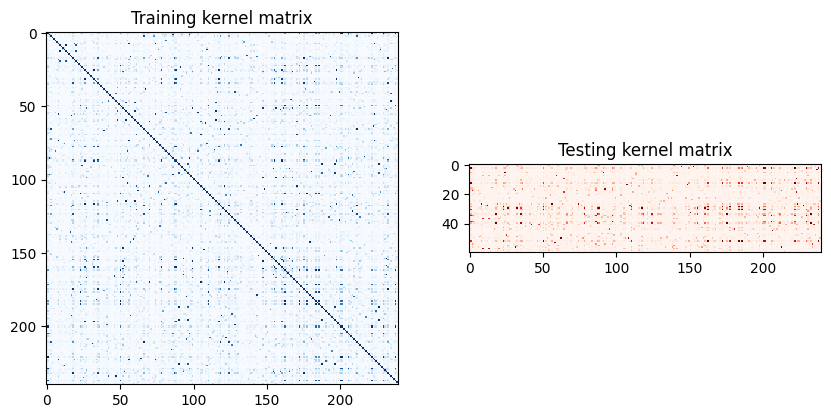

In [ ]:
matrix_train = kernel.evaluate(x_vec=X_train_q1)
matrix_test = kernel.evaluate(x_vec=X_test_q1, y_vec=X_train_q1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues")
axs[0].set_title("Training kernel matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Testing kernel matrix")

plt.show()

In [ ]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=63f6780a1f59cda321b670ff738966a17342185775202c111bbea2f5434039c3
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


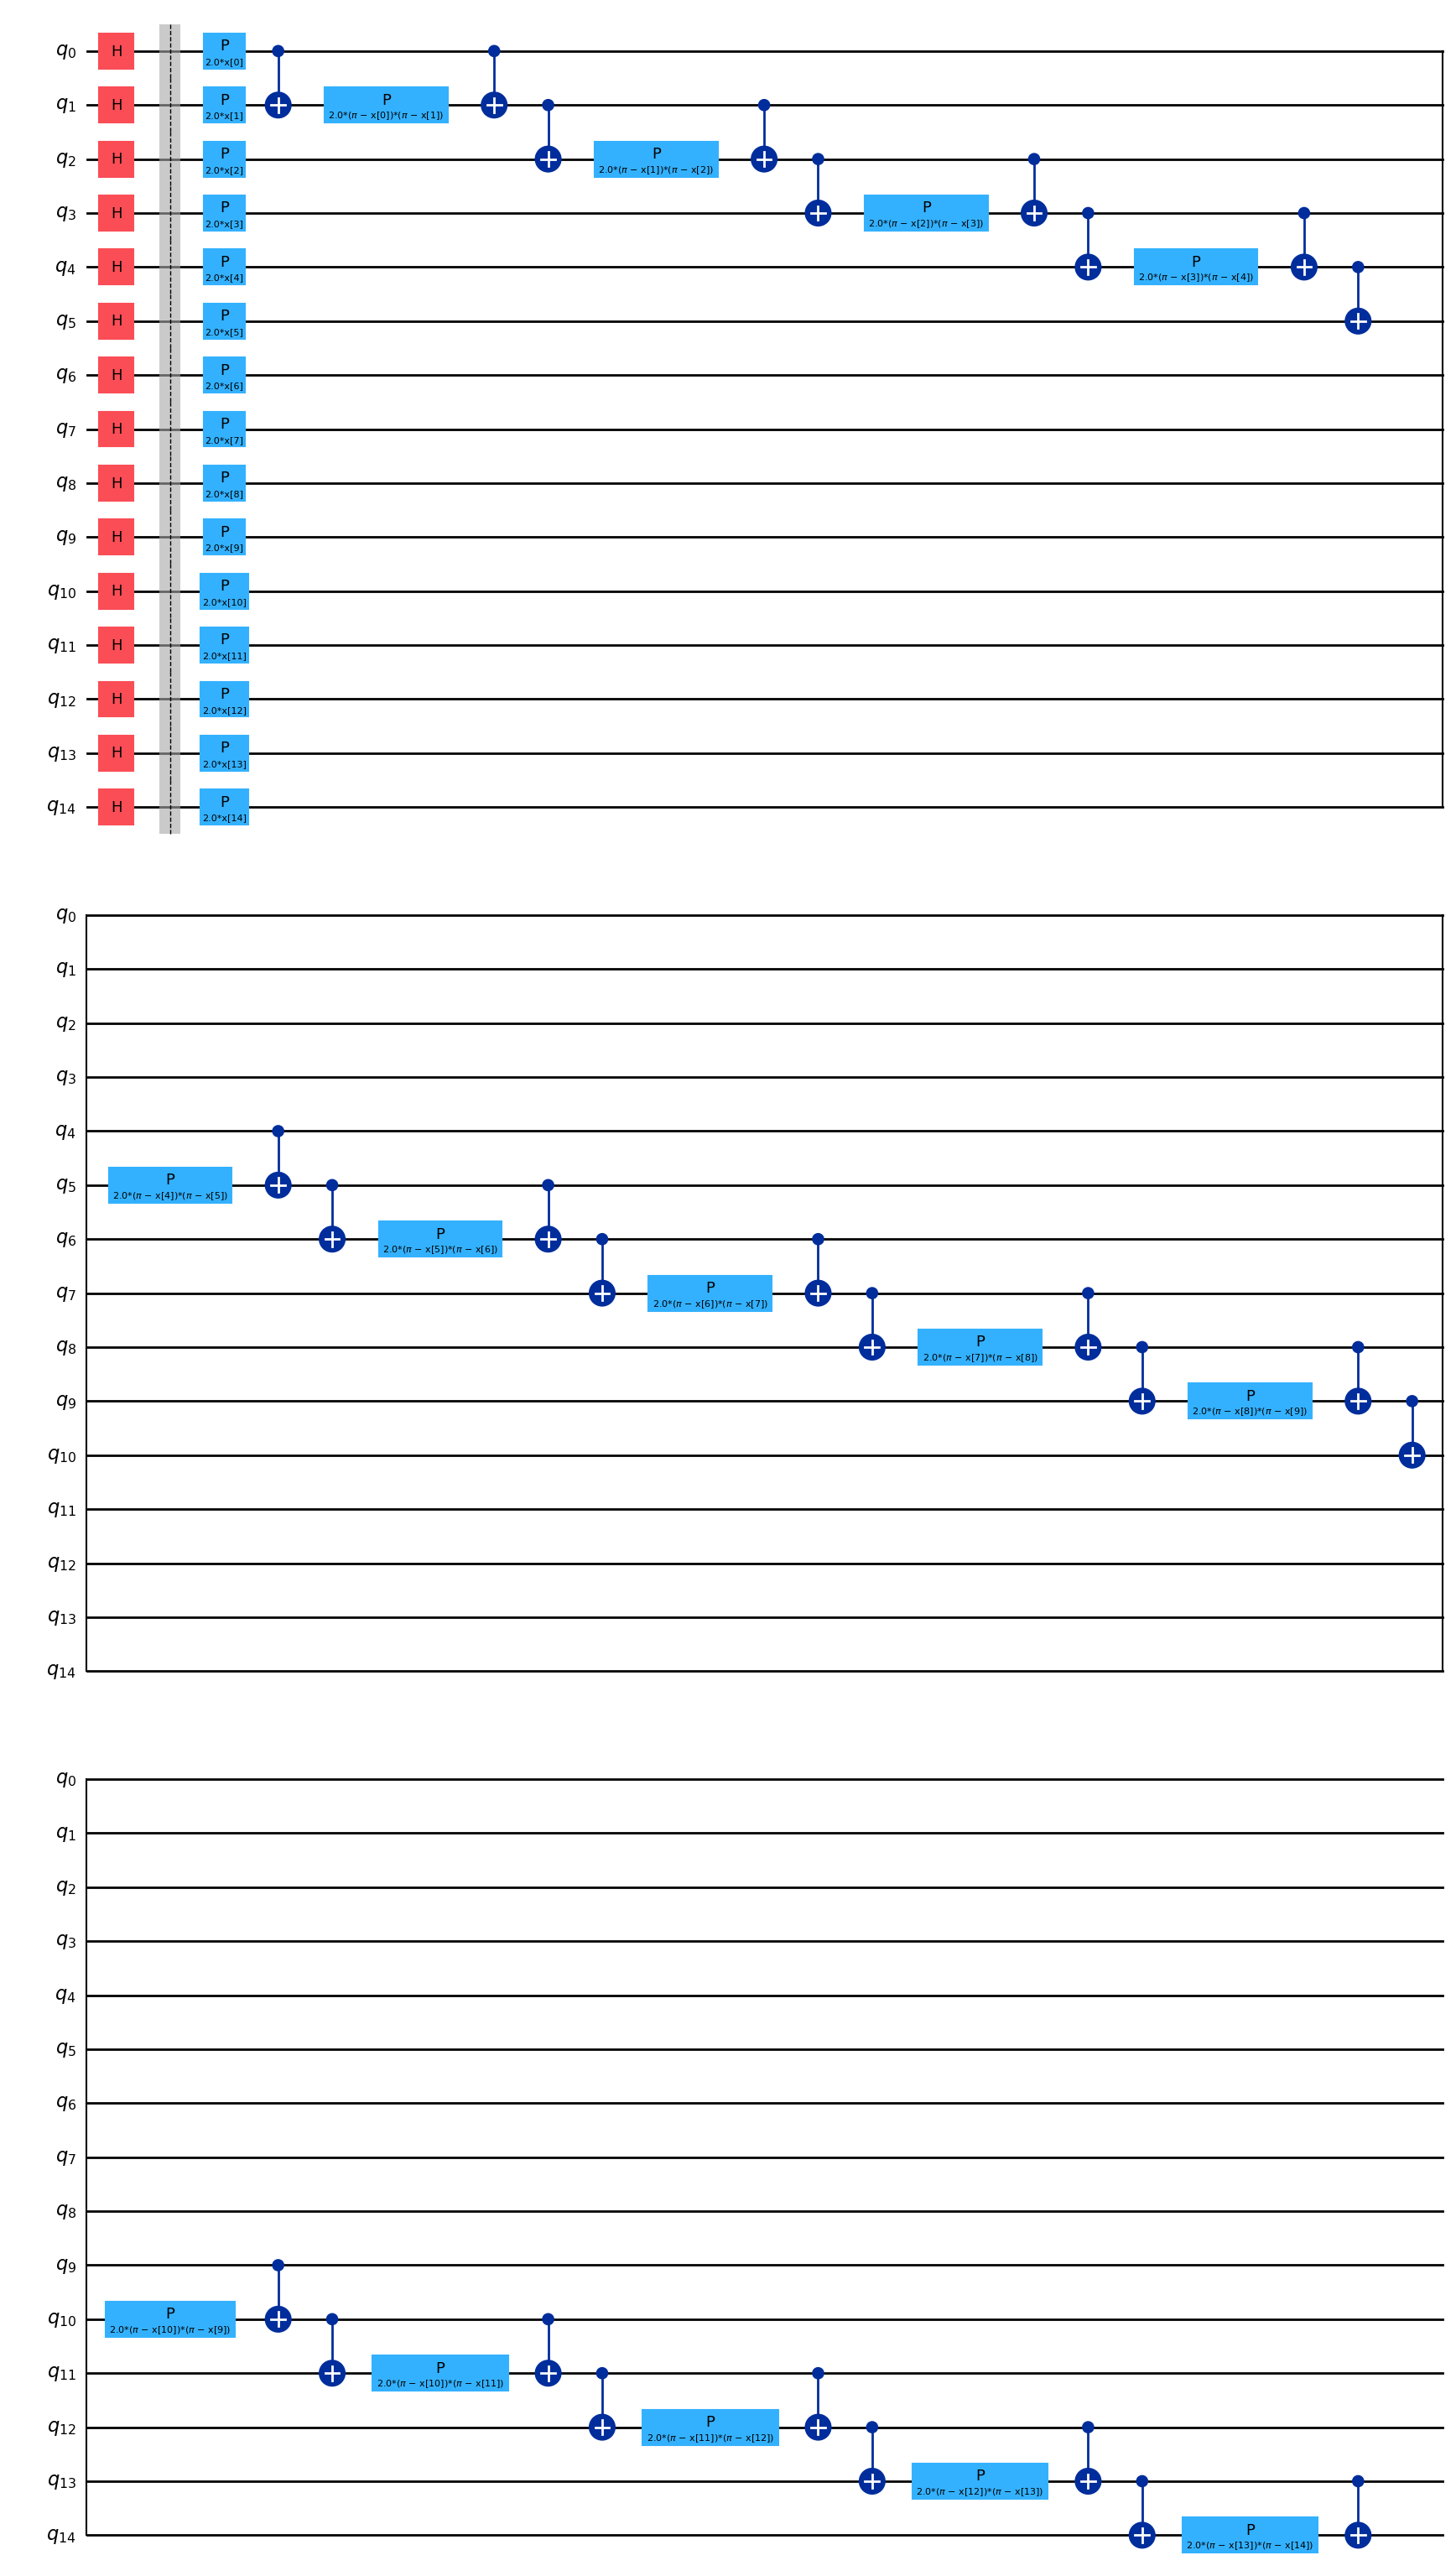

In [ ]:
from qiskit.visualization import plot_circuit_layout, circuit_drawer

# Descomponer el feature map
decomposed_feature_map = feature_map.decompose()

# Dibujar el circuito descompuesto
circuit_drawer(decomposed_feature_map, output='mpl')

# Si estás en un entorno Jupyter Notebook, muestra el circuito descompuesto
# En otros entornos, puedes usar `decomposed_feature_map.draw(output='mpl')` para guardar o mostrar el circuito
decomposed_feature_map.draw(output='mpl')

### QSVM (zzFeatureMap + EFFICIENTSU2)  (PRUEBA)

In [ ]:
from qiskit.circuit.library import ZZFeatureMap, EfficientSU2
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler


zz_feature_map = ZZFeatureMap(feature_dimension=15, reps=1, entanglement="linear", insert_barriers=True)
efficient_su2 = EfficientSU2()

# Combine the circuits into a single QuantumCircuit
combined_feature_map = QuantumCircuit()
combined_feature_map = zz_feature_map.compose(efficient_su2, front=True)

# Instantiate the Sampler
sampler = Sampler()

# Create the ComputeUncompute fidelity computation object
fidelity = ComputeUncompute(sampler=sampler)

# Create the FidelityQuantumKernel with the combined feature map
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=combined_feature_map)


In [ ]:
# Compute the kernel matrix for the training data
kernel_matrix_train = kernel.evaluate(X_train_q1)

# Create and train the SVM model using the quantum kernel
qsvm = SVC(kernel='precomputed', probability=True)
qsvm.fit(kernel_matrix_train, Y_train_q1)

# Compute the kernel matrix for the test data (with respect to the training data)
kernel_matrix_test = kernel.evaluate(X_test_q1, X_train_q1)

In [ ]:
# Evaluate the model on the test set
Y_pred_qsvm = qsvm.predict(kernel_matrix_test)
accuracy = np.mean(Y_pred_qsvm == Y_test_q1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5666666666666667


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.41      0.48        29
           1       0.56      0.71      0.63        31

    accuracy                           0.57        60
   macro avg       0.57      0.56      0.55        60
weighted avg       0.57      0.57      0.56        60



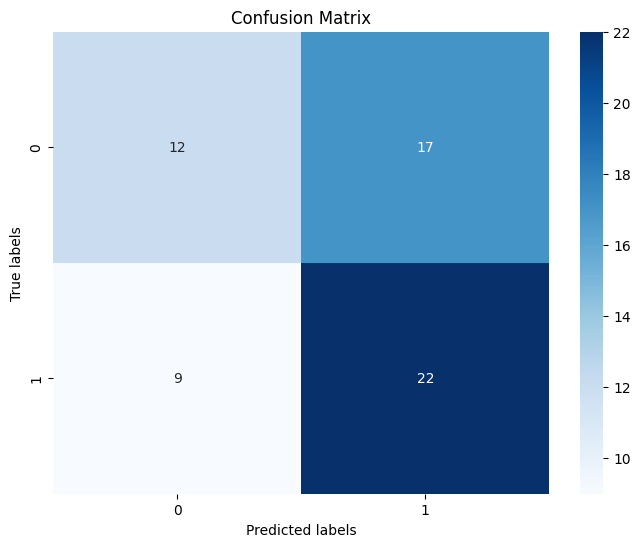

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Print a classification report
print("Classification Report:")
print(classification_report(Y_test_q1, Y_pred_qsvm))

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(Y_test_q1, Y_pred_qsvm)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# VALIDACIONES/CONCLUSIONES (SOLO) MODELO CLÁSICO

Curva de Aprendizaje dependiendo del numero de muestras de entrenamiento que se cojan

In [ ]:
def plot_learning_curve(estimator, title, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


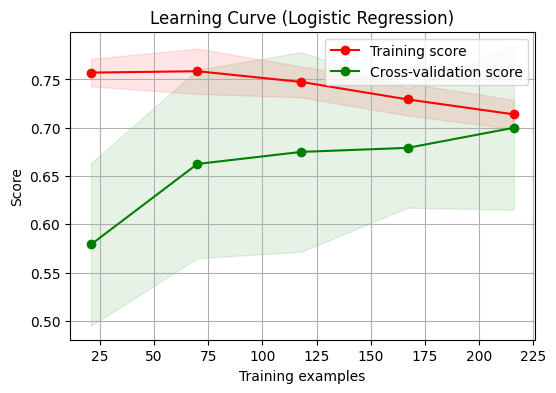

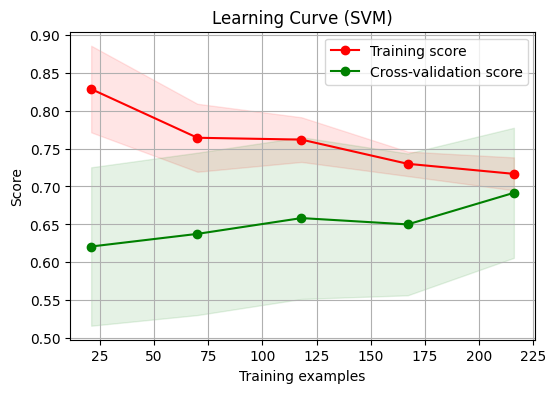

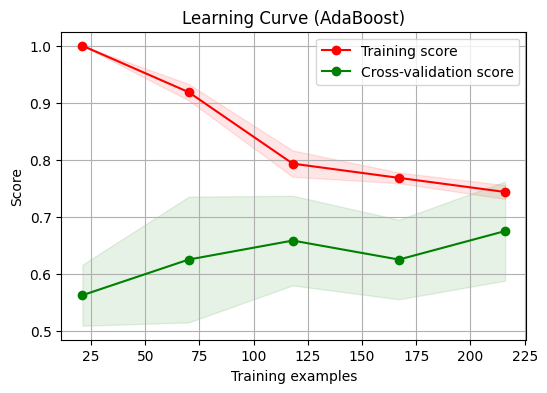

In [ ]:
from sklearn.model_selection import learning_curve

# Para Logistic Regression
plot_learning_curve(best_model_lr, "Learning Curve (Logistic Regression)", X_train_q1, Y_train_q1, cv=10)
plt.show()

# Para SVM
plot_learning_curve(best_model_svm, "Learning Curve (SVM)", X_train_q1, Y_train_q1, cv=10)
plt.show()

# Para AdaBoost
plot_learning_curve(best_model_ada, "Learning Curve (AdaBoost)", X_train_q1, Y_train_q1, cv=10)
plt.show()


SE PASA A GRAFICAR LA CURVA DE APRENDIZAJE PARA LOS DATOS DE ENTRENAMIENTO

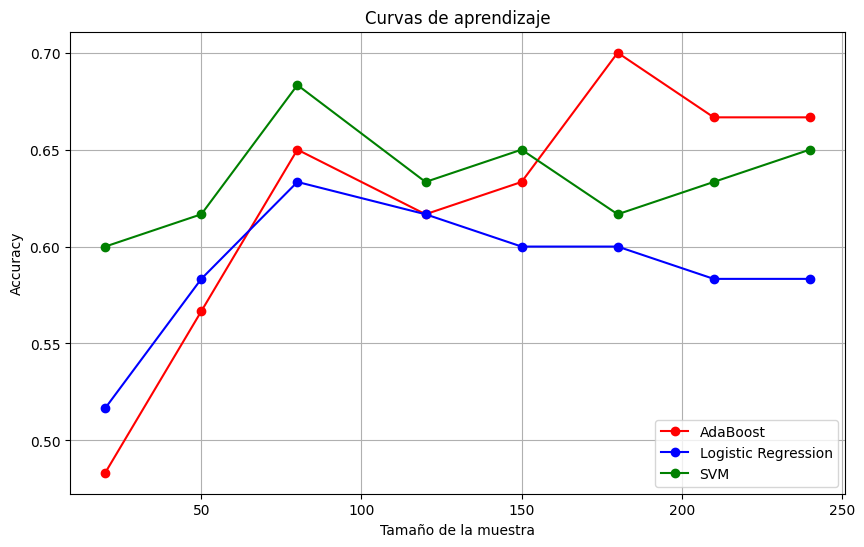

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

# Convertir los arrays numpy a DataFrames de pandas
X_train_q1_df = pd.DataFrame(X_train_q1)
Y_train_q1_df = pd.DataFrame(Y_train_q1)

# Generar las curvas de aprendizaje
train_sizes = [20, 50, 80, 120, 150, 180, 210, 240]

accuracies_ada = []
accuracies_lr = []
accuracies_svm = []

for size in train_sizes:
    # Subconjunto de entrenamiento
    X_subset = X_train_q1_df.sample(n=size, random_state=42)
    Y_subset = Y_train_q1_df.sample(n=size, random_state=42)

    # Entrenar y evaluar AdaBoost
    best_model_ada.fit(X_subset, Y_subset.values.ravel())
    Y_pred_ada = best_model_ada.predict(X_test_q1)
    accuracies_ada.append(accuracy_score(Y_test_q1, Y_pred_ada))

    # Entrenar y evaluar Logistic Regression
    best_model_lr.fit(X_subset, Y_subset.values.ravel())
    Y_pred_lr = best_model_lr.predict(X_test_q1)
    accuracies_lr.append(accuracy_score(Y_test_q1, Y_pred_lr))

    # Entrenar y evaluar SVM
    best_model_svm.fit(X_subset, Y_subset.values.ravel())
    Y_pred_svm = best_model_svm.predict(X_test_q1)
    accuracies_svm.append(accuracy_score(Y_test_q1, Y_pred_svm))

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accuracies_ada, marker='o', linestyle='-', color='r', label='AdaBoost')
plt.plot(train_sizes, accuracies_lr, marker='o', linestyle='-', color='b', label='Logistic Regression')
plt.plot(train_sizes, accuracies_svm, marker='o', linestyle='-', color='g', label='SVM')
plt.title('Curvas de aprendizaje')
plt.xlabel('Tamaño de la muestra')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


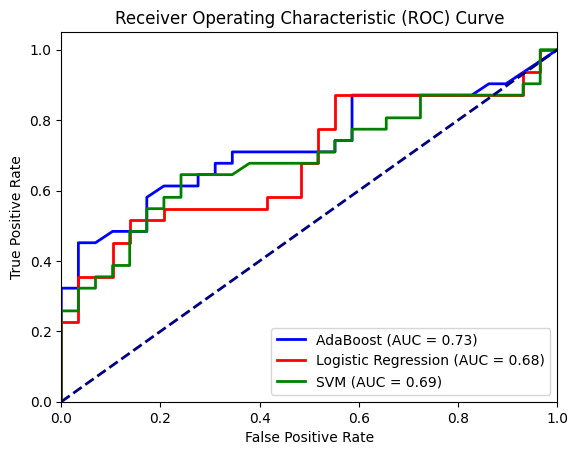

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


# Modelo 1: AdaBoostClassifier
best_model_ada.fit(X_train_q1, Y_train_q1)
probas_ada = best_model_ada.predict_proba(X_test_q1)[:, 1]

# Modelo 2: Logistic Regression con mejores hiperparámetros
best_model_lr.fit(X_train_q1, Y_train_q1)
probas_lr = best_model_lr.predict_proba(X_test_q1)[:, 1]

# Modelo 3: SVC con mejores hiperparámetros
best_model_svm.fit(X_train_q1, Y_train_q1)
probas_svm = best_model_svm.predict_proba(X_test_q1)[:, 1]

# Calcular las curvas ROC y AUC
fpr_ada, tpr_ada, _ = roc_curve(Y_test_q1, probas_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_lr, tpr_lr, _ = roc_curve(Y_test_q1, probas_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(Y_test_q1, probas_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotear las curvas
plt.figure()
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

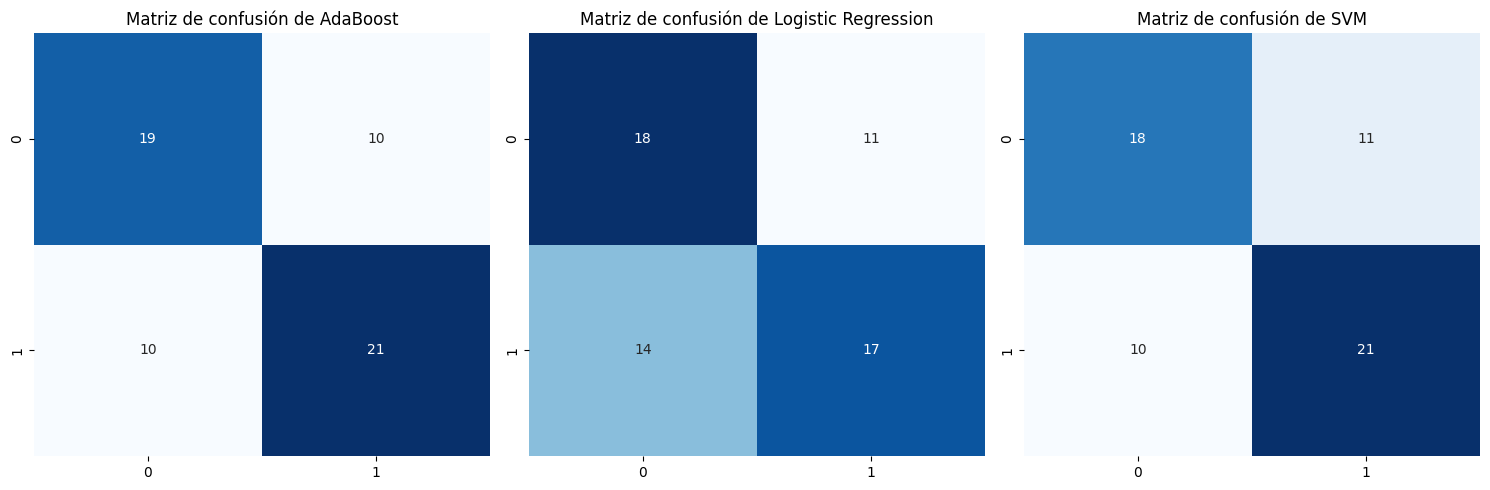

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


# Tamaño del conjunto de entrenamiento
size = len(X_q1)

# Subconjunto de entrenamiento
idx = np.random.choice(range(len(X_q1)), size, replace=False)
X_subset, Y_subset = X_q1[idx], Y_q1[idx]

# Obtener matrices de confusión de los modelos
conf_matrix_ada = confusion_matrix(Y_test_q1, Y_pred_ada)
conf_matrix_lr = confusion_matrix(Y_test_q1, Y_pred_lr)
conf_matrix_svm = confusion_matrix(Y_test_q1, Y_pred_svm)

# Plotear matrices de confusión usando Seaborn
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión de AdaBoost')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión de Logistic Regression')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión de SVM')

plt.tight_layout()
plt.show()


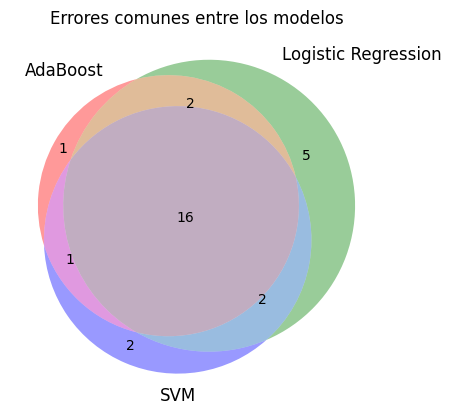

In [ ]:
from matplotlib_venn import venn3

# Predicciones para cada modelo
Y_pred_ada = best_model_ada.predict(X_test_q1)
Y_pred_lr = best_model_lr.predict(X_test_q1)
Y_pred_svm = best_model_svm.predict(X_test_q1)

# Índices de los errores para cada modelo
errors_ada = set(np.where(Y_pred_ada != Y_test_q1)[0])
errors_lr = set(np.where(Y_pred_lr != Y_test_q1)[0])
errors_svm = set(np.where(Y_pred_svm != Y_test_q1)[0])

# Encontrar errores comunes y exclusivos
common_errors = errors_ada & errors_lr & errors_svm
ada_lr_errors = errors_ada & errors_lr - common_errors
ada_svm_errors = errors_ada & errors_svm - common_errors
lr_svm_errors = errors_lr & errors_svm - common_errors
only_ada_errors = errors_ada - errors_lr - errors_svm
only_lr_errors = errors_lr - errors_ada - errors_svm
only_svm_errors = errors_svm - errors_ada - errors_lr

# Crear un diagrama de Venn con los errores de los tres modelos
venn3(
    subsets=(len(only_ada_errors), len(only_lr_errors), len(ada_lr_errors), len(only_svm_errors), len(ada_svm_errors), len(lr_svm_errors), len(common_errors)),
    set_labels=('AdaBoost', 'Logistic Regression', 'SVM')
)

# Mostrar el diagrama
plt.title("Errores comunes entre los modelos")
plt.show()

In [ ]:
errors_ada = np.where(Y_pred_ada != Y_test_q1)[0]
errors_lr = np.where(Y_pred_lr != Y_test_q1)[0]
errors_svm = np.where(Y_pred_svm != Y_test_q1)[0]

# Encontrar errores comunes entre los modelos
common_errors = set(errors_ada) & set(errors_lr) & set(errors_svm)
print("Errores comunes entre todos los modelos:", common_errors)

Errores comunes entre todos los modelos: {1, 34, 36, 6, 7, 8, 43, 48, 52, 21, 23, 55, 25, 27, 29, 31}


In [ ]:
print("Errores del modelo AdaBoost:", errors_ada)
print("Errores del modelo Logistic Regression:", errors_lr)
print("Errores del modelo SVM:", errors_svm)

Errores del modelo AdaBoost: [ 1  4  6  7  8 21 23 24 25 27 29 31 33 34 36 43 48 51 52 55]
Errores del modelo Logistic Regression: [ 1  4  6  7  8 16 21 22 23 25 27 29 31 33 34 36 37 41 43 46 48 49 52 55
 57]
Errores del modelo SVM: [ 1  6  7  8 21 23 25 27 29 31 34 36 38 41 43 44 48 49 51 52 55]


Una forma más visual de ver esto es mediante el siguiente gráfico

Errores Comunes:

Los índices 1, 34, 36, 6, 7, 8, 43, 48, 52, 21, 23, 55, 25, 27, 29 y 31 representan errores comunes entre los tres modelos. Esto sugiere que estos ejemplos específicos del conjunto de prueba son particularmente difíciles de clasificar para todos los modelos. Las posibles razones pueden incluir:
Ruido en los datos (datos atípicos o incorrectamente etiquetados).
Ejemplos que están cerca de la frontera de decisión entre clases.
Características no suficientemente informativas para distinguir entre las clases.
Errores de AdaBoost:

AdaBoost cometió errores adicionales en los índices 5, 7, 33, y 47. Estos errores adicionales pueden indicar que AdaBoost tiene ciertas debilidades específicas para estos ejemplos. Esto podría deberse a su naturaleza de combinar muchos clasificadores débiles, lo que podría no capturar adecuadamente las complejidades de estos datos específicos.
Errores de Logistic Regression:

Logistic Regression tuvo errores adicionales en los índices 16, 23, 24, 36, 37, 38, 41, 44, 49, y 57. Esto sugiere que Logistic Regression, al ser un modelo lineal, puede no estar capturando bien las relaciones no lineales en estos datos, lo que lleva a errores adicionales en comparación con SVM y AdaBoost.
Errores de SVM:

SVM compartió muchos errores con Logistic Regression pero no con AdaBoost, y no tuvo errores adicionales únicos. Esto sugiere que aunque SVM puede manejar relaciones no lineales (dependiendo del kernel usado), en este caso particular, su desempeño fue similar al de Logistic Regression en términos de los errores adicionales cometidos.
Implicaciones Prácticas:
Mejora de Datos: Considerar una revisión de los datos de prueba en los índices donde todos los modelos fallan para verificar si hay ruido o etiquetado incorrecto.
Modelos Más Complejos: Explorar modelos más complejos o técnicas de ensamblaje adicionales para capturar mejor las relaciones subyacentes en los datos.
Feature Engineering: Trabajar en la ingeniería de características para proporcionar información más relevante a los modelos y mejorar su capacidad de clasificación.
Combinación de Modelos: Considerar un enfoque de votación o stacking que combine las fortalezas de cada modelo para potencialmente reducir los errores.
En resumen, aunque hay errores comunes entre los modelos, cada uno también presenta errores únicos, lo que sugiere diferentes áreas de mejora y posibles beneficios de enfoques combinados o modelos más complejos.









# VALIDACIONES/CONCLUSIONES DE TODOS LOS MODELOS

0.67 0.61 0.65, 0.67, 0.526, 0.711, 0.717, 0.567

[20, 50, 80,120, 150, 180, 210,240]

ESTOS DATOS SON FIABLES

In [ ]:
#accuracies_qsvm = [0.67, 0.61, 0.65, 0.67, 0.53, 0.71, 0.72, 0.57]

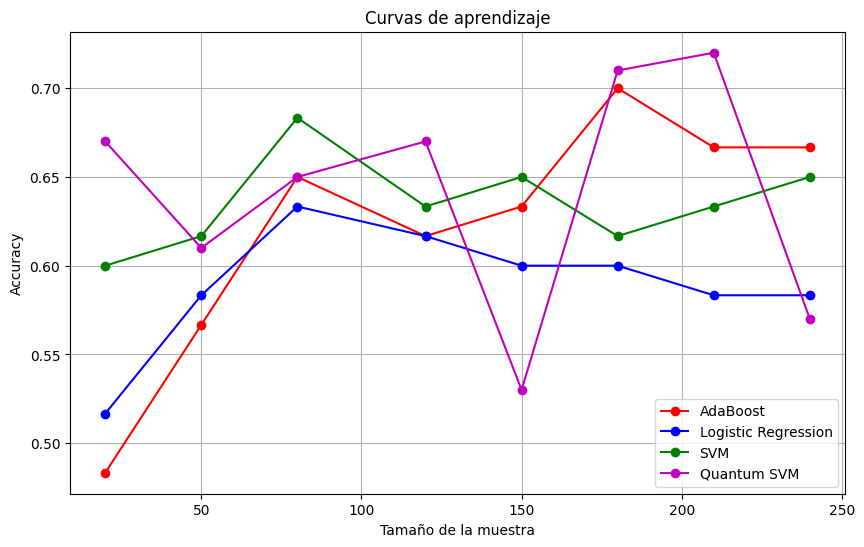

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convertir los arrays numpy a DataFrames de pandas
X_train_q1_df = pd.DataFrame(X_train_q1)
Y_train_q1_df = pd.DataFrame(Y_train_q1)

# Generar las curvas de aprendizaje
train_sizes = [20, 50, 80, 120, 150, 180, 210, 240]

accuracies_ada = []
accuracies_lr = []
accuracies_svm = []

for size in train_sizes:
    # Subconjunto de entrenamiento
    X_subset = X_train_q1_df.sample(n=size, random_state=42)
    Y_subset = Y_train_q1_df.sample(n=size, random_state=42)

    # Entrenar y evaluar AdaBoost
    best_model_ada.fit(X_subset, Y_subset.values.ravel())
    Y_pred_ada = best_model_ada.predict(X_test_q1)
    accuracies_ada.append(accuracy_score(Y_test_q1, Y_pred_ada))

    # Entrenar y evaluar Logistic Regression
    best_model_lr.fit(X_subset, Y_subset.values.ravel())
    Y_pred_lr = best_model_lr.predict(X_test_q1)
    accuracies_lr.append(accuracy_score(Y_test_q1, Y_pred_lr))

    # Entrenar y evaluar SVM
    best_model_svm.fit(X_subset, Y_subset.values.ravel())
    Y_pred_svm = best_model_svm.predict(X_test_q1)
    accuracies_svm.append(accuracy_score(Y_test_q1, Y_pred_svm))

# Valores de precisión de QSVC
accuracies_qsvm = [0.67, 0.61, 0.65, 0.67, 0.53, 0.71, 0.72, 0.57]

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accuracies_ada, marker='o', linestyle='-', color='r', label='AdaBoost')
plt.plot(train_sizes, accuracies_lr, marker='o', linestyle='-', color='b', label='Logistic Regression')
plt.plot(train_sizes, accuracies_svm, marker='o', linestyle='-', color='g', label='SVM')
plt.plot(train_sizes, accuracies_qsvm, marker='o', linestyle='-', color='m', label='Quantum SVM')
plt.title('Curvas de aprendizaje')
plt.xlabel('Tamaño de la muestra')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


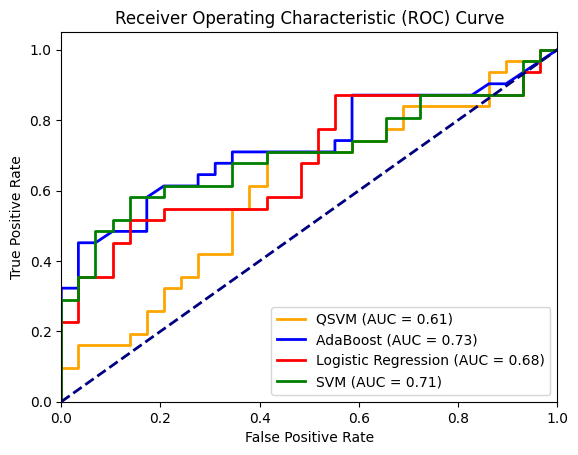

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap


# Modelo QSVM
probas_qsvm = qsvm.predict_proba(X_test_q1)[:, 1]
fpr_qsvm, tpr_qsvm, _ = roc_curve(Y_test_q1, probas_qsvm)
roc_auc_qsvm = auc(fpr_qsvm, tpr_qsvm)

# Modelo AdaBoost
best_model_ada.fit(X_train_q1, Y_train_q1)
probas_ada = best_model_ada.predict_proba(X_test_q1)[:, 1]
fpr_ada, tpr_ada, _ = roc_curve(Y_test_q1, probas_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Modelo Logistic Regression
best_model_lr.fit(X_train_q1, Y_train_q1)
probas_lr = best_model_lr.predict_proba(X_test_q1)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(Y_test_q1, probas_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Modelo SVM
svm_optimo.fit(X_train_q1, Y_train_q1)
probas_svm = svm_optimo.predict_proba(X_test_q1)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(Y_test_q1, probas_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotear las curvas ROC
plt.figure()
plt.plot(fpr_qsvm, tpr_qsvm, color='orange', lw=2, label=f'QSVM (AUC = {roc_auc_qsvm:.2f})')
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


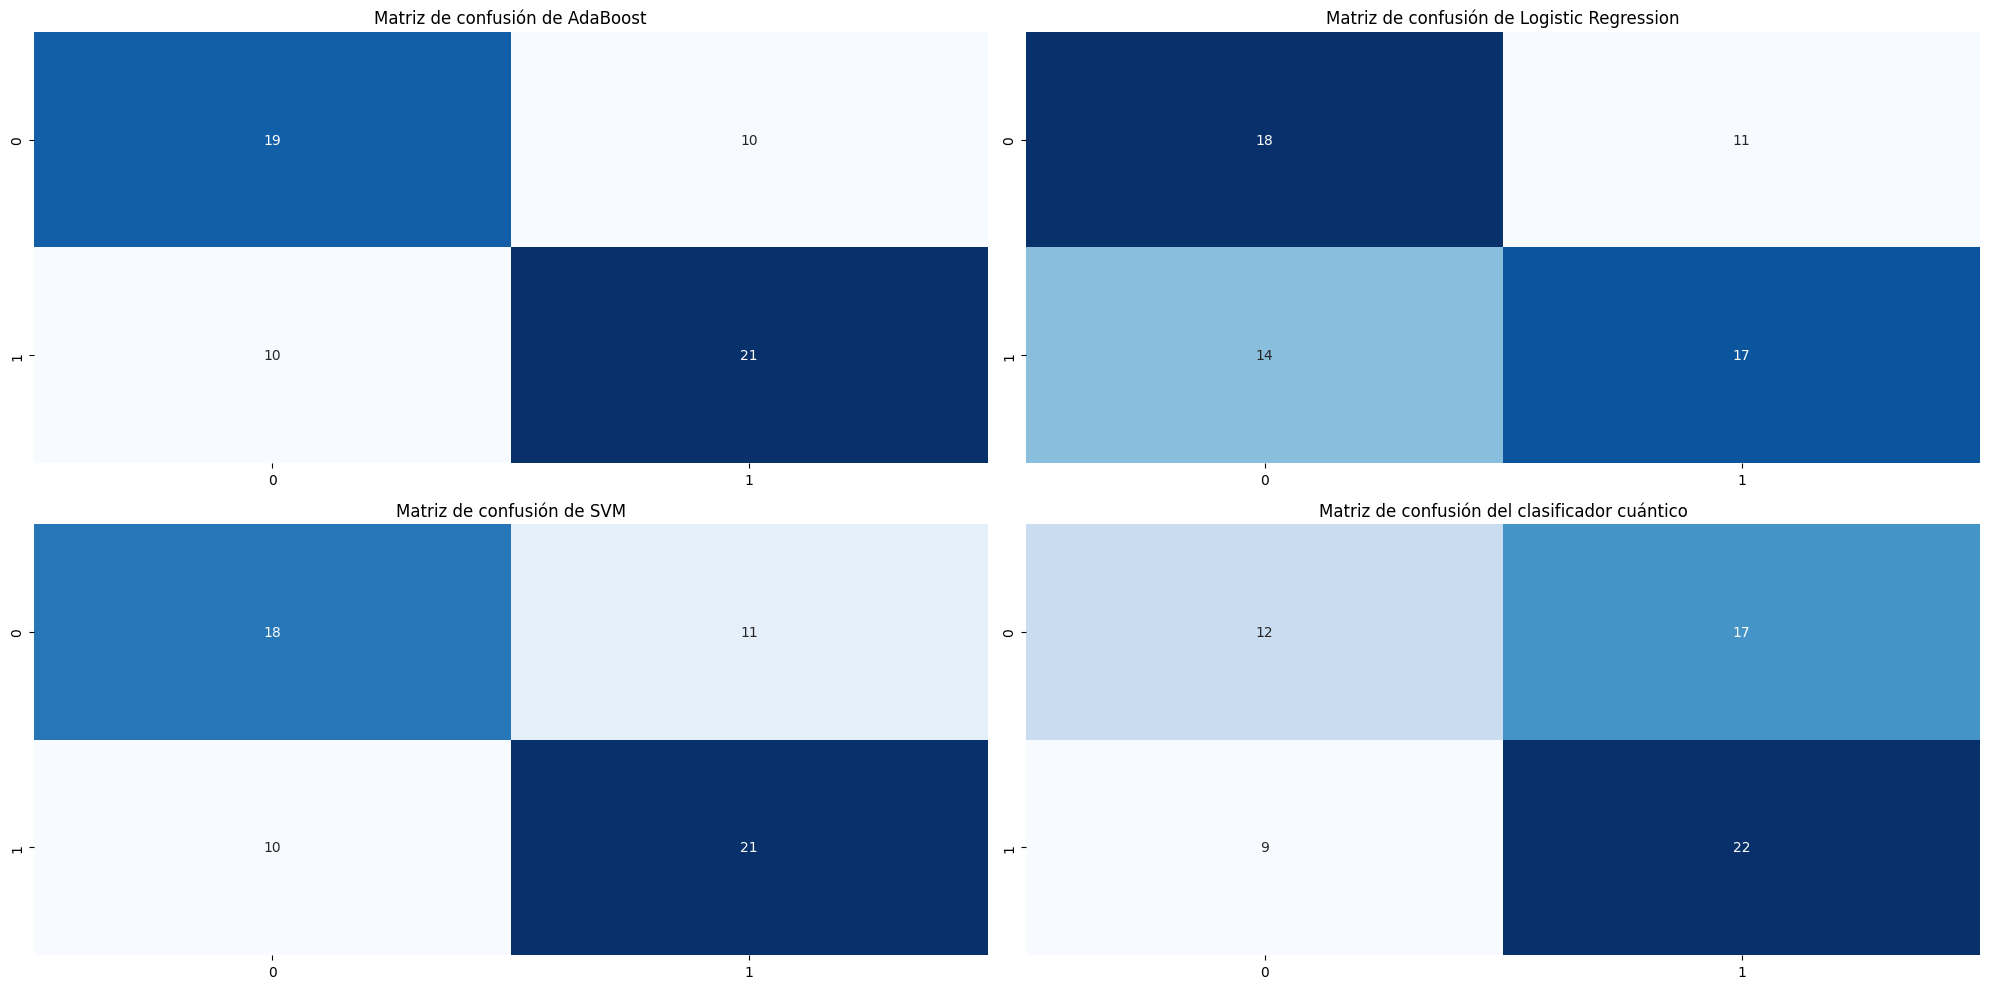

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Tamaño del conjunto de entrenamiento
size = len(X_train_q1)

# Subconjunto de entrenamiento
idx = np.random.choice(range(len(X_train_q1)), size, replace=False)
X_subset, Y_subset = X_train_q1[idx], Y_train_q1[idx]

# Obtener matrices de confusión de los modelos clásicos
conf_matrix_ada = confusion_matrix(Y_test_q1, y_pred_ada)
conf_matrix_lr = confusion_matrix(Y_test_q1, y_pred_lr)
conf_matrix_svm = confusion_matrix(Y_test_q1, y_pred_svm)

# Calcular la matriz de confusión del clasificador cuántico
conf_matrix_cuantico = confusion_matrix(Y_test_q1, predict_clf_cuantico)

# Plotear matrices de confusión usando Seaborn
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión de AdaBoost')

plt.subplot(2, 2, 2)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión de Logistic Regression')

plt.subplot(2, 2, 3)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión de SVM')

plt.subplot(2, 2, 4)
sns.heatmap(conf_matrix_cuantico, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión del clasificador cuántico')

plt.tight_layout()
plt.show()
